In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop(columns=['society','balcony','area_type','availability'],axis=1,inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df.shape

(13246, 5)

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['bhk']=df['size'].apply(lambda x:int(x.split(' ')[0]))


In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df.drop(columns=['size'],inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def float_conversion(x):
    temp=x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [16]:
df['total_sqft']=df['total_sqft'].apply(float_conversion)

In [17]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [18]:
df['price_per_sqfeet']=df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqfeet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [19]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [20]:
df['location']=df['location'].apply(lambda x:x.strip())

In [21]:
df['location'].value_counts()

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [22]:
location_count=df['location'].value_counts()
location_less_than_30=location_count[location_count<=30]
location_less_than_30

location
Chikkalasandra                    30
Doddathoguru                      30
Kumaraswami Layout                30
Ananth Nagar                      30
BTM 2nd Stage                     29
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1197, dtype: int64

In [23]:
df['location']=df['location'].apply(lambda x:'other' if x in location_less_than_30 else x)

In [24]:
df['location'].value_counts()

location
other              5492
Whitefield          535
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      266
                   ... 
Kalena Agrahara      33
Tumkur Road          33
Basavangudi          32
Ambedkar Nagar       31
Mahadevpura          31
Name: count, Length: 97, dtype: int64

In [25]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqfeet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,other,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,other,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [26]:
df.shape

(13246, 6)

In [27]:
df.dropna(inplace=True)

In [28]:
df=df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(12456, 6)

In [29]:
df['price_per_sqfeet'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqfeet, dtype: float64

In [30]:
def price_per_sqfeet_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean=np.mean(subdf.price_per_sqfeet)
        sd=np.std(subdf.price_per_sqfeet)
        reduced_df=subdf[(subdf.price_per_sqfeet>(mean-sd)) & (subdf.price_per_sqfeet<=(mean+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df=price_per_sqfeet_outliers(df)
df.shape
    

(10545, 6)

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqfeet),
                'std': np.std(bhk_df.price_per_sqfeet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqfeet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)
df.shape

(6656, 6)

Text(0, 0.5, 'Count')

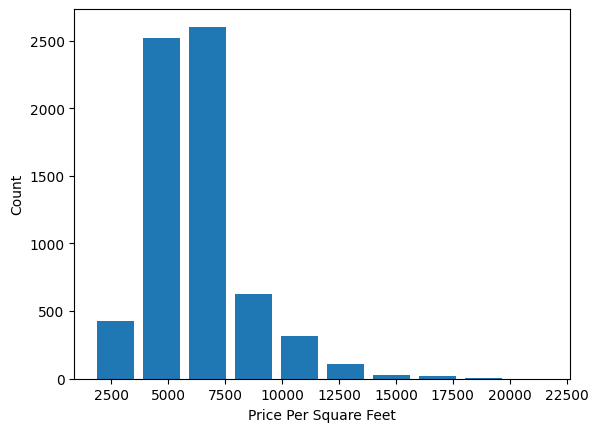

In [32]:
plt.hist(df['price_per_sqfeet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")     

In [33]:
df['bath'].unique()

array([ 2.,  3.,  5.,  1.,  4.,  6.,  8.,  7.,  9., 12., 16., 13., 10.])

In [34]:
df[df['bath']>df['bhk']+2]


,location,total_sqft,bath,price,bhk,price_per_sqfeet
4964,Thanisandra,1806.0,6.0,116.0,3,6423.034330
7014,other,11338.0,9.0,1000.0,6,8819.897689
9866,other,7000.0,8.0,450.0,4,6428.571429


In [35]:
df=df[df['bath']<(df['bhk']+2)]
df.shape

(6584, 6)

In [37]:
df['location'].value_counts()

location
other                    2096
Whitefield                238
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Tumkur Road                20
Hosakerehalli              19
R.T. Nagar                 18
Bommanahalli               13
Basavangudi                10
Name: count, Length: 97, dtype: int64

In [38]:
df.drop(columns=['price_per_sqfeet'],inplace=True)
df.tail()

,location,total_sqft,bath,price,bhk
10539,other,1015.0,2.0,60.0,2
10541,other,1805.0,3.0,134.0,3
10542,other,3600.0,5.0,400.0,4
10543,other,4689.0,4.0,488.0,4
10544,other,550.0,1.0,17.0,1


In [39]:
dummies=pd.get_dummies(df.location,dtype=int)
dummies.head()

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,Anekal,Attibele,Balagere,Banashankari,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df2=pd.concat([df,dummies],axis='columns')
df2.drop(columns=['location','other'],axis=1,inplace=True)
df2.head()

,total_sqft,bath,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1075.0,2.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1150.0,3.0,52.5,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1256.0,2.0,62.8,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1207.0,2.0,63.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1725.0,2.0,100.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df2.shape

(6584, 100)

In [42]:
X=df2.drop(columns=['price'])
y=df2['price']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8681581227885122

In [46]:
lr.score(X_test,y_test)

0.8681581227885122

## Decison Tree Regressor

In [47]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.812847510332407

In [49]:
clf.score(X_test,y_test)

0.812847510332407

## K-Nearest Neighbour

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [51]:
knn.score(X_test,y_test)

0.7529166788571093

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
rf.score(X_test,y_test)

0.8488514071435934

## Adaboost

In [54]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)

AdaBoostRegressor()

In [55]:
ab.score(X_test,y_test)

0.6870512631970567

## Best Performing Algorithm

In [64]:
model_names = ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbour','Random Forest', 'AdaBoost']
accuracy_scores = [0.86, 0.81, 0.75,0.84,0.68]
data = {'Model Name': model_names, 'Accuracy Score': accuracy_scores}
pd.DataFrame(data)



,Model Name,Accuracy Score
0,Linear Regression,0.86
1,Decision Tree,0.81
2,K-Nearest Neighbour,0.75
3,Random Forest,0.84
4,AdaBoost,0.68


In [57]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '5th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'Akshaya Nagar',
       'Ambedkar Nagar', 'Anekal', 'Attibele', 'Balagere', 'Banashankari',
       'Bannerghatta Road', 'Basavangudi', 'Begur Road', 'Bellandur',
       'Bhoganhalli', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra',
       'Brookefield', 'Budigere', 'CV Raman Nagar', 'Chandapura',
       'Channasandra', 'Devanahalli', 'Electronic City',
       'Electronic City Phase II', 'Electronics City Phase 1', 'Frazer Town',
       'Gottigere', 'Green Glen Layout', 'HSR Layout', 'Haralur Road',
       'Harlur', 'Hebbal', 'Hebbal Kempapura', 'Hegde Nagar', 'Hennur',
       'Hennur Road', 'Hoodi', 'Horamavu Agara', 'Hormavu', 'Hosa Road',
       'Hosakerehalli', 'Hosur Road', 'Hulimavu', 'Indira Nagar', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'Jigani', 'KR Puram', 'Kadugodi',
       'Kaggadasapura', 'Kalena Agrahara', 'Kanakapura', 'Kanakpura Road',
   

In [58]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [59]:
predict_price('5th Phase JP Nagar',1725.0,2.0,3)


C:\Users\BRATAJIT DAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.14215837915962

In [60]:
import pickle


In [61]:
pickle.dump(lr,open('lr.pkl','wb'))

In [62]:
X_train.head()

,total_sqft,bath,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambedkar Nagar,Anekal,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
1993,1645.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4063,1185.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5507,3252.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9026,1490.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2967,551.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))